# Titanic Data EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("pastel")
sns.set_style("whitegrid")

In [2]:
test_df = pd.read_csv("test.csv", index_col="PassengerId")
train_df = pd.read_csv("train.csv", index_col="PassengerId")

#### Cleaning Training Data

In [3]:
train_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Dealing with missing values.

In [5]:
train_df.drop(["Cabin"], axis=1, inplace=True)

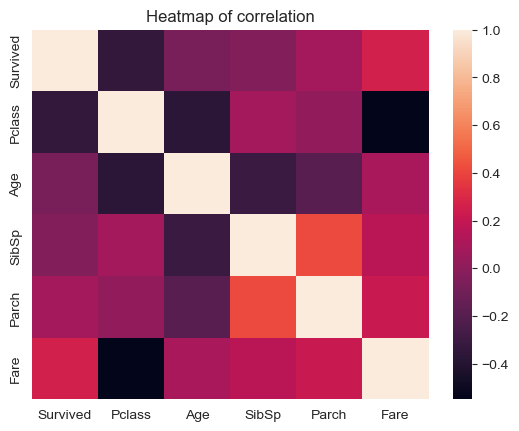

In [6]:
sns.heatmap(train_df.corr())
plt.title("Heatmap of correlation")
plt.show()

Understanding correlation between features, for better idea of analysis/development

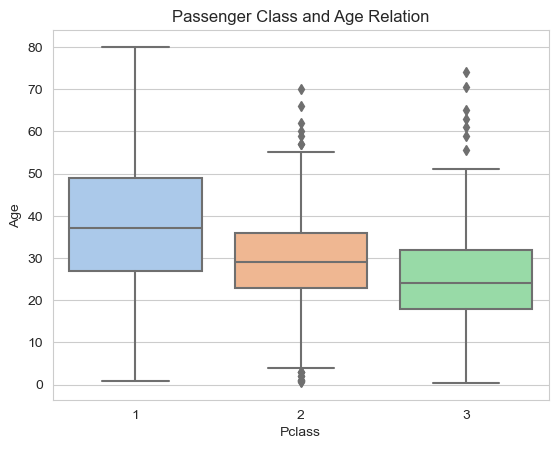

In [7]:
sns.boxplot(data=train_df, x="Pclass", y="Age")
plt.title("Passenger Class and Age Relation")
plt.show()

Box plot shows the average age by class, which helps in filling missing age values

In [8]:
def missing_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if(pd.isna(Age)):
        if(Pclass == 1):
            return 37
        elif(Pclass == 2):
            return 30
        else:
            return 24
    else:
        return Age

In [9]:
train_df["Age"] = train_df[["Age", "Pclass"]].apply(missing_age, axis=1)

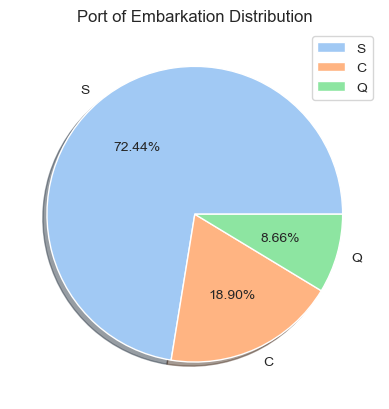

In [10]:
plt.pie(train_df["Embarked"].value_counts(), labels=["S", "C", "Q"], autopct="%.2f%%", shadow=True)
plt.legend()
plt.title("Port of Embarkation Distribution")
plt.show()

In [11]:
train_df["Embarked"].fillna("S", inplace=True)

Voila! Data is cleaned.

In [12]:
train_df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Feature Handling

Name and Ticket of passenger won't contribute to our data analysis hence it is removed

In [13]:
train_df.drop(["Name", "Ticket"], axis=1, inplace=True)

In [14]:
train_df.shape

(891, 8)

In [15]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.078754,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.244931,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


### Univariate Analysis

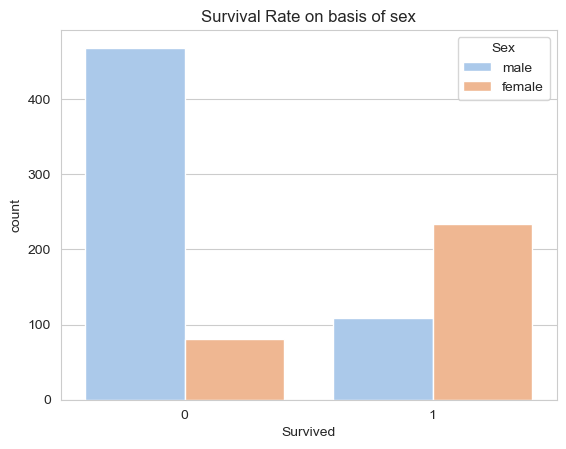

In [17]:
sns.countplot(data=train_df,x="Survived", hue="Sex")
plt.title("Survival Rate on basis of sex")
plt.show()

Females have considerably higher chances of survival

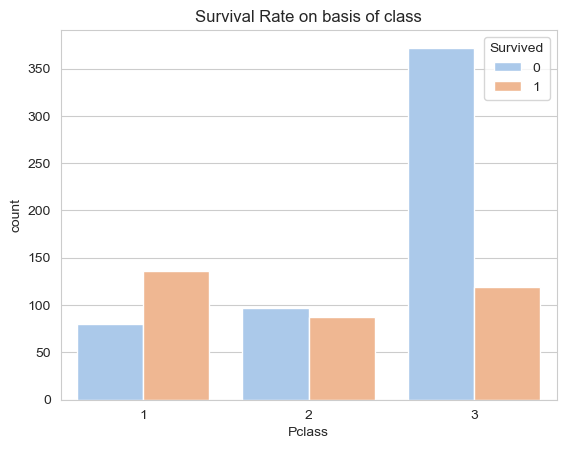

In [18]:
sns.countplot(data=train_df,x="Pclass", hue="Survived")
plt.title("Survival Rate on basis of class")
plt.show()

Passengers in third-class were more prone to die during the disaster

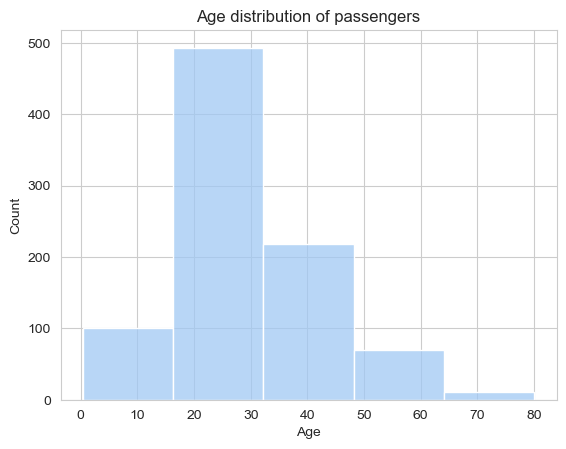

In [19]:
sns.histplot(data=train_df,x="Age", bins=5)
plt.title("Age distribution of passengers")
plt.show()

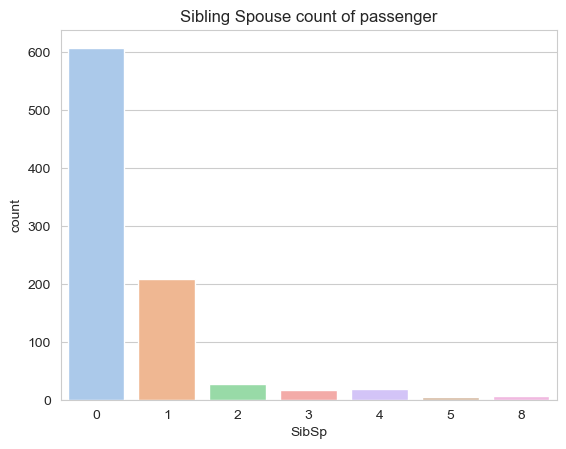

In [20]:
sns.countplot(data=train_df,x="SibSp")
plt.title("Sibling Spouse count of passenger")
plt.show()

### Bivariate Analysis

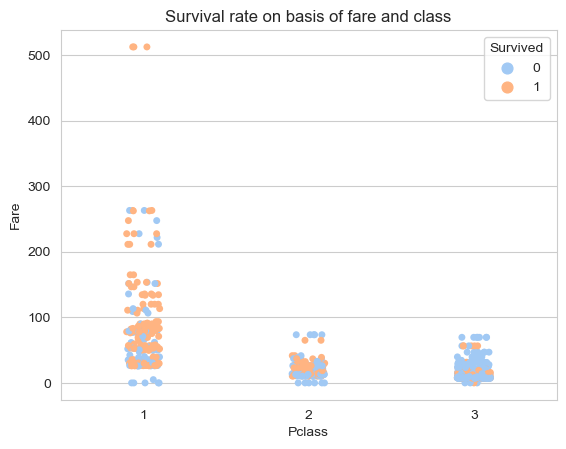

In [21]:
sns.stripplot(data=train_df, x="Pclass", y="Fare", hue="Survived")
plt.title("Survival rate on basis of fare and class")
plt.show()

People with upper class ticket pays more and have higher chances of survival

C:\Anacondadown\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


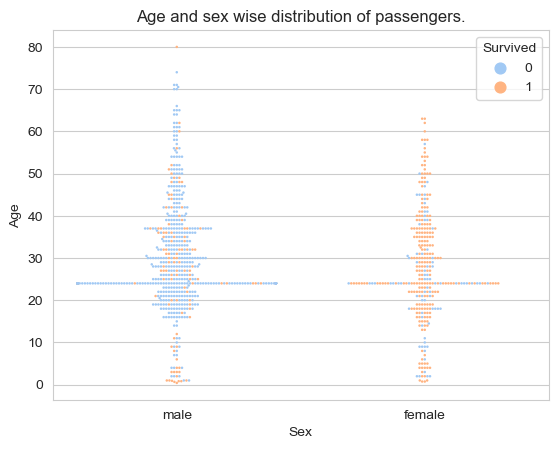

In [22]:
sns.swarmplot(data=train_df, x="Sex", y="Age", hue="Survived", size=1.8)
plt.title("Age and sex wise distribution of passengers.")
plt.show()

Major amount of males passengers died during disaster, meaning females were given priority for rescue

### Working of Test Data

In [23]:
test_df.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [24]:
test_df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

In [25]:
test_df["Age"] = test_df[["Age", "Pclass"]].apply(missing_age, axis=1)

In [26]:
test_df["Fare"].fillna(test_df["Fare"].mean(), inplace=True)

Test Dataset is also cleaned!

In [27]:
train_df.to_csv("Cleaned_Train_Data.csv")
test_df.to_csv("Cleaned_Test_Data.csv")